In [52]:
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import optimizers

In [3]:
from keras import models

In [17]:
from keras. applications import VGG16

base_dir = '/Users/Wolf-Pack/Desktop/Experiments/dogs_cats/all/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [13]:
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')

train_datagen = ImageDataGenerator(
      rescale=1./255)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 1000 images belonging to 2 classes.


In [48]:
batch_size = 20

def extract_features(directory,sample_count):
    generator = train_datagen.flow_from_directory(directory,target_size=(150,150),batch_size=20,class_mode='binary')
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    i=0
    for input_batch,labels_batch in generator:
        features[i*batch_size : ((i+1)*batch_size)] = conv_base.predict(input_batch)
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i+=1
        if i*batch_size >= sample_count:
            break
    return features,labels

In [51]:
train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir, 1000) 
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6668 - acc: 0.6190 - val_loss: 0.5480 - val_acc: 0.7510
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5409 - acc: 0.7290 - val_loss: 0.5006 - val_acc: 0.7690
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4736 - acc: 0.7810 - val_loss: 0.4496 - val_acc: 0.8010
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4199 - acc: 0.8135 - val_loss: 0.4287 - val_acc: 0.8100
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4026 - acc: 0.8120 - val_loss: 0.4235 - val_acc: 0.8150
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3801 - acc: 0.8295 - val_loss: 0.4034 - val_acc: 0.8220
Epoch 7/30
2000/2000 [

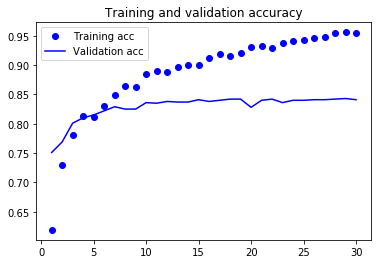

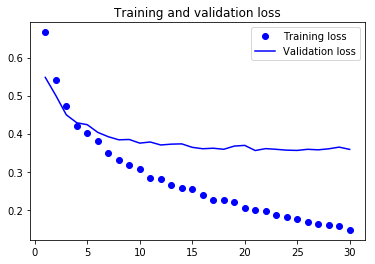

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()